# No Show Appointment Analyze (Brazil, 2016)

## Table of Contents
<ul>
<li><a href="#nsad">No Show Appointments Data</a></li>
<li><a href="#gender">What genders might refuse going back to hospitals</a></li>
<li><a href="#age">What ages tend not to revisit</a></li>
<li><a href="#reason">Probable reasons</a></li>
<li><a href="#sum">Summary</a></li>
</ul>

After all the processes and instructions, why don't the patients show up at appointments?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='nsad'></a>
## No Show Appointments Data

In [ ]:
#load the datasets
no_show = pd.read_csv('noshowappointments2016.csv')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1.0,1.0,0.0,0.0,0.0,No


In [ ]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64731 entries, 0 to 64730
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       64731 non-null  float64
 1   AppointmentID   64731 non-null  int64  
 2   Gender          64731 non-null  object 
 3   ScheduledDay    64731 non-null  object 
 4   AppointmentDay  64731 non-null  object 
 5   Age             64731 non-null  int64  
 6   Neighbourhood   64731 non-null  object 
 7   Scholarship     64731 non-null  int64  
 8   Hipertension    64730 non-null  float64
 9   Diabetes        64730 non-null  float64
 10  Alcoholism      64730 non-null  float64
 11  Handcap         64730 non-null  float64
 12  SMS_received    64730 non-null  float64
 13  No-show         64730 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 6.9+ MB


In [ ]:
sum(no_show.duplicated())

0

In [ ]:
#rename columns
no_show = no_show.rename(columns = {'Handcap' : 'Handicap'})
no_show = no_show.rename(columns = {'No-show' : 'No_show'})

#fix dtype
for col in ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']:
    no_show[col] = no_show[col].astype(bool)
bool_cols = no_show.columns[no_show.dtypes == 'bool']
no_show[bool_cols] = no_show[bool_cols].replace({True: 'Yes', False: 'No'})

#drop unnecessary columns
no_show.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
no_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,F,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,F,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,F,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [ ]:
no_show['Age'].describe()

count    64731.000000
mean        36.678160
std         22.923713
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

In [ ]:
no_show['Gender'].value_counts()

F    41750
M    22981
Name: Gender, dtype: int64

In [ ]:
no_show['Age'] = no_show['Age'].astype(int)

In [ ]:
#new data which patients have at least one health issue
con = np.where((no_show.No_show == 'Yes') & ((no_show.Hipertension == 'Yes') | (no_show.Scholarship == 'Yes') | (no_show.Diabetes == 'Yes') | (no_show.Alcoholism == 'Yes') | (no_show.Handicap == 'Yes')))
new = no_show.loc[con]
new.drop('No_show', axis = 1, inplace = True)

In [ ]:
#drop ages outliers
index = no_show[(no_show['Age'] <= 0)].index
no_show.drop(index, inplace = True)
no_show['Age'].describe()

count    62607.000000
mean        37.922501
std         22.274102
min          1.000000
25%         19.000000
50%         37.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

<a id='reason'></a>
## What genders might refuse going back to hospitals

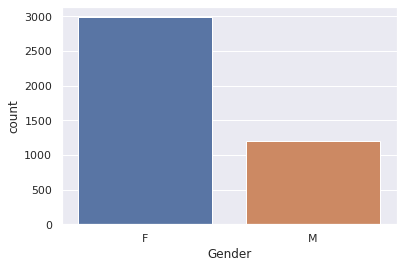

In [ ]:
#count gender
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'Gender', data = new)

Female patients refuse to go back to hospitals are twice as many as male patients.

<a id='age'></a>
## What ages tend not to revisit

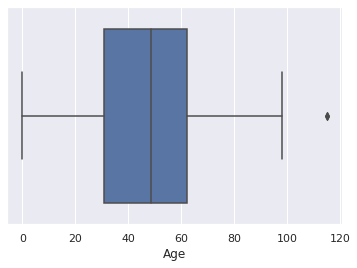

In [ ]:
#age group
sns.set(style = "darkgrid")
sns.boxplot(x ='Age', data = new)
plt.show();

Ages around 50 tend not to revisit.

<a id='reason'></a>
## Possible reasons

In [ ]:
#collect the top 10 neighbourhoods with health issues and not showing up
values = new['Neighbourhood'].value_counts()[:10]
values

RESISTÊNCIA         194
GURIGICA            170
SANTO ANDRÉ         165
DA PENHA            155
ILHA DO PRÍNCIPE    141
CARATOÍRA           137
SANTOS DUMONT       131
ANDORINHAS          120
CENTRO              116
JARDIM DA PENHA     116
Name: Neighbourhood, dtype: int64

We'll choose the first ten places, with over 200 patients absent.[1]

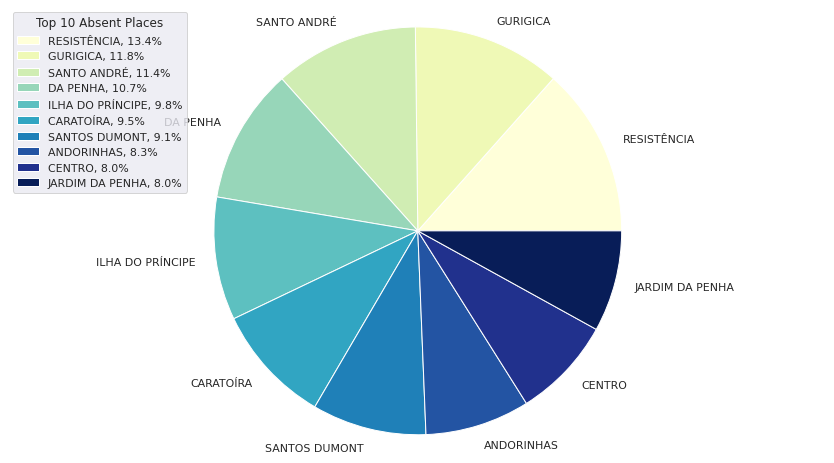

In [ ]:
#using pie chart to see its proportion
theme = plt.get_cmap('YlGnBu')
values.plot.pie(cmap = theme, figsize = [14.7, 8.27])
labels = ['RESISTÊNCIA',
      'GURIGICA',
      'SANTO ANDRÉ',
      'DA PENHA',
      'ILHA DO PRÍNCIPE',
      'CARATOÍRA',
      'SANTOS DUMONT',
      'ANDORINHAS',
      'CENTRO',
      'JARDIM DA PENHA']
total = sum(values)

plt.ylabel("")
plt.legend(
    loc = 'upper left',
    labels = ['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, values)],
    prop = {'size': 11},
    bbox_to_anchor = (0.0, 1),
    title = "Top 10 Absent Places"
)
 
plt.axis('equal');

Resistencia has the highest non returns, it could be result from various health issues or their local medical conditions.

### Places and health issues
Above the top ten non showing places, what kind of health issues have the most in absent reasons.

In [ ]:
#top 10 neighbourhoods

myneighbourhoods = values.index
myneighbourhoods

Index(['RESISTÊNCIA', 'GURIGICA', 'SANTO ANDRÉ', 'DA PENHA',
       'ILHA DO PRÍNCIPE', 'CARATOÍRA', 'SANTOS DUMONT', 'ANDORINHAS',
       'CENTRO', 'JARDIM DA PENHA'],
      dtype='object')

In [ ]:
def neighbourhoodsvaluecounts(grp, neighbourhood):
    #group 'Neighbourhood' and sum up Boolean values
    
    #get the group for particular neighbourhood
    grpN = grp.get_group(neighbourhood)
    
    #not counting neighbourhoods
    grpN = grpN.drop(['Neighbourhood','Gender','Age'], axis = 1)
    
    #return results(value counts for each column)
    return(grpN.apply(pd.value_counts))

In [ ]:
#display the table we need
n = new.groupby(new['Neighbourhood'])

from IPython.core.display import display
for neighbourhood in myneighbourhoods:
    print(neighbourhood)
    display(neighbourhoodsvaluecounts(n, neighbourhood))

RESISTÊNCIA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,116,91,157,175,186,114
Yes,78,103,37,19,8,80


GURIGICA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,85,73,129,157,165,110
Yes,85,97,41,13,5,60


SANTO ANDRÉ


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,98,82,119,142,153,98
Yes,67,83,46,23,12,67


DA PENHA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,88,69,120,129,138,100
Yes,67,86,35,26,17,55


ILHA DO PRÍNCIPE


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,48,95,132,136,136,70
Yes,93,46,9,5,5,71


CARATOÍRA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,82,62,106,122,124,97
Yes,55,75,31,15,13,40


SANTOS DUMONT


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,83,41,100,121,130,94
Yes,48,90,31,10,1,37


ANDORINHAS


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,66,55,92,113,109,86
Yes,54,65,28,7,11,34


CENTRO


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,94,35,88,113,101,70
Yes,22,81,28,3,15,46


JARDIM DA PENHA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,116.0,8,77,111,106,66
Yes,NaN,108,39,5,10,50


The top three absent places from the previous section are Resistencia, Gurigica, and Santo Andre. Their reasons for not going back to hospitals are Hipertension, no scholarship, and no SMS received. 

### Issue counts

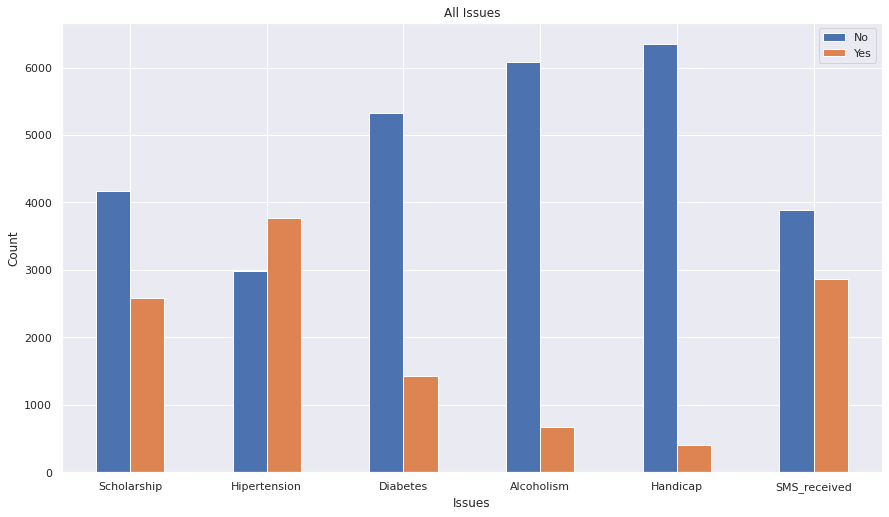

In [ ]:
#get transpose (.T) and plot
## Reason -x axis variable are the row index

new[["Scholarship", 
     "Hipertension", 
     "Diabetes", 
     "Alcoholism", 
     "Handicap", 
     "SMS_received"]].apply(pd.value_counts).T.plot.bar(figsize = [14.7, 8.27], rot = 0)
plt.xlabel('Issues')
plt.ylabel('Count')
plt.title('All Issues');

Top three factors of not showing up: Hipertension, no scholarship, and no SMS message received.
Hipertension, a chronic which might cause severe illness or putting oneself in the risk of death, and it is also the only issue with Yes's more than No's. Secondly, not having financial subsidy could impact the patient's decision of not going to medical centres. Without receiving appointment notification could also be easy to ignore. 

<a id='sum'></a>
## Summary

* Female patients tend not to show up at appointments.
* Ages around 50 have the most no show up count.
* Resistencia has the highest absent rate in hospital returns.
* Hipertension, no scholarship, and no SMS received are the top three not showing reasons.

We couldn't exactly tell from the sample data about who to blame for the non returning reasons, also the data only shows a part of common issues, however the yes's and no's have a significant difference in their counts, there might have a lot more conditions to consider.


## References

[1][**How to pie Chart with different color themes in Matplotlib?**](https://www.pythonprogramming.in/how-to-pie-chart-with-different-color-themes-in-matplotlib.html)

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0